# QP 2 Analysis 
## Vincent Mariani
## 12-18-2025

In [1]:
# Packages

library(tidyverse)

library(emmeans)
library(easystats)

library(arrow)
library(data.table)
library(dtplyr)

library(ggplot2)
library(ggthemes)
library(patchwork)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   4.0.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Welcome to emmeans.
Caution: You lose important information if you filter this package's results.
See '? untidy'

# Attaching packages: easystats 0.7.5
✔ bayestestR  0.17.0   ✔ correlation 0.8.8 
✔ datawizard  1.3.0    ✔ effectsize  1.0.1 
✔ insight     1.4.4    ✔ modelbased  0.13.1
✔ performance 0.15.3   ✔ parameters  0.28.3
✔ report      0.6.2    ✔ see         0.12.0



Attaching package: 'arrow'


The following object is masked from 'package:lubridate':

    duration



In [2]:
# Reading the data from parquets; see end of file for original read-in code. 

# df_full <- read_parquet("Data/Full Data.parquet")
# df_sent <- read_parquet("Data/Filtered Sentences.parquet")
df_nps <- read_parquet("Data/NPs Only.parquet")


---

## Data Description: 

In [5]:
summary(df_full)

  file_name            bnc_id          sentence_id          filename        
 Length:111571140   Length:111571140   Length:111571140   Length:111571140  
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
   modality            s_text           s_verb_count      s_aux_count     
 Length:111571140   Length:111571140   Min.   :  0.000   Min.   :  0.000  
 Class :character   Class :character   1st Qu.:  1.000   1st Qu.:  1.000  
 Mode  :character   Mode  :character   Median :  3.000   Median :  1.000  
                                       Mean   :  3.103   Mean   :  1.739  
         

**Data Attributes:**

- Total tokens: 111,571,140
- Total sentences: 6,017,843 
- Transitivity: Transitive: 38,611,085; Intransitive: 72,960,055


In [6]:
summary(df_sent)

  file_name            bnc_id          sentence_id           s_text         
 Length:204577      Length:204577      Length:204577      Length:204577     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 s_trans            w_idx           w_tok             phr_tok         
 Mode:logical   Min.   : 0.000   Length:204577      Length:204577     
 TRUE:204577    1st Qu.: 1.000   Class :character   Class :character  
                Median : 2.000   Mode  :character   Mode  :character  
                Mean   : 2.661                                        
                3rd Qu.: 4.00

**Filtered Data Description:**

- Total tokens: 204,557
- Total Sentences: 34,799
- Total NPs: 68,737
- Definiteness: Indef: 42,783; Indef: 79,419 


In [7]:
summary(df_nps)

  file_name            bnc_id          sentence_id           s_text         
 Length:67118       Length:67118       Length:67118       Length:67118      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 s_trans            w_idx           w_tok             phr_tok         
 Mode:logical   Min.   : 0.000   Length:67118       Length:67118      
 TRUE:67118     1st Qu.: 0.000   Class :character   Class :character  
                Median : 2.000   Mode  :character   Mode  :character  
                Mean   : 2.105                                        
                3rd Qu.: 3.00

**NP Description:**
- Number of NPs: 67,118
- Number of Sentences: 33,559
- ArgPos: 33,559 ea. 
- Definiteness: Indef : 18,785; Def: 48,333

In [8]:
# Count of each NP type:

print("Grand totals")
df_nps %>%
    count(argPos, definiteness) %>% 
    pivot_wider(
        names_from = definiteness,
        values_from = n,
        values_fill = 0
    )

print("Grand props")
df_nps %>% 
    count(argPos, definiteness) %>%
    mutate(prop = n / sum(n)) %>% 
    pivot_wider(
        names_from = definiteness,
        values_from = c(n, prop),
        values_fill = 0,
        names_vary = "slowest"
    )

[1] "Grand totals"


argPos,indef,def
<fct>,<int>,<int>
obj,13113,20446
sbj,5672,27887


[1] "Grand props"


argPos,n_indef,prop_indef,n_def,prop_def
<fct>,<int>,<dbl>,<int>,<dbl>
obj,13113,0.19537233,20446,0.3046277
sbj,5672,0.08450788,27887,0.4154921


In [9]:
# Proportions by category:

#Grouped by argPos
print("Grouped by argPos")
df_nps %>%
    count(argPos, definiteness) %>%
    group_by(argPos) %>%
    mutate(prop = n / sum(n)) %>% 
    pivot_wider(
        names_from = definiteness, 
        values_from = c(n, prop),
        names_vary = "slowest"
    )

# grouped by definiteness
print("Grouped by definiteness")
df_nps %>%
    count(definiteness, argPos) %>%
    group_by(definiteness) %>%
    mutate(prop = n / sum(n)) %>% 
        pivot_wider(
        names_from = argPos, 
        values_from = c(n, prop),
        names_vary = "slowest"
    )

[1] "Grouped by argPos"


argPos,n_indef,prop_indef,n_def,prop_def
<fct>,<int>,<dbl>,<int>,<dbl>
obj,13113,0.3907447,20446,0.6092553
sbj,5672,0.1690158,27887,0.8309842


[1] "Grouped by definiteness"


definiteness,n_obj,prop_obj,n_sbj,prop_sbj
<fct>,<int>,<dbl>,<int>,<dbl>
indef,13113,0.6980570,5672,0.3019430
def,20446,0.4230236,27887,0.5769764


In [4]:
# NPs by start position and definiteness: 

df_nps %>% 
    count(definiteness, np_idx) %>% 
    arrange(np_idx) %>%
    group_by(np_idx) %>%
    mutate(prop = n/sum(n)) %>% 
    pivot_wider(
        names_from = np_idx,
        values_from = c(n, prop), 
        names_vary = "slowest"
    ) %>%
    print(width = Inf, n = Inf)

# A tibble: 2 × 29
  definiteness   n_0 prop_0   n_2 prop_2   n_3 prop_3   n_4 prop_4   n_5 prop_5
  <fct>        <int>  <dbl> <int>  <dbl> <int>  <dbl> <int>  <dbl> <int>  <dbl>
1 indef         5672  0.169  6789  0.346  3895  0.433  1505  0.483   598  0.520
2 def          27887  0.831 12860  0.654  5107  0.567  1610  0.517   551  0.480
    n_6 prop_6   n_7 prop_7   n_8 prop_8   n_9 prop_9  n_10 prop_10  n_11
  <int>  <dbl> <int>  <dbl> <int>  <dbl> <int>  <dbl> <int>   <dbl> <int>
1   217  0.528    74    0.5    22  0.423     6  0.353     4   0.364     1
2   194  0.472    74    0.5    30  0.577    11  0.647     7   0.636     1
  prop_11  n_12 prop_12  n_13 prop_13  n_16 prop_16
    <dbl> <int>   <dbl> <int>   <dbl> <int>   <dbl>
1     0.5     1       1    NA      NA     1       1
2     0.5    NA      NA     1       1    NA      NA


## Statistics

In [5]:
model <- glm(
    data = df_nps,
    formula = surprisal ~ argPos * definiteness * np_idx,
    family = Gamma(link = 'log')
)

In [12]:
summary(model)
model_parameters(model, exponentiate = TRUE)


Call:
glm(formula = surprisal ~ argPos * definiteness * np_idx, family = Gamma(link = "log"), 
    data = df_nps)

Coefficients: (2 not defined because of singularities)
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       1.584199   0.015812 100.187  < 2e-16 ***
argPossbj                         0.371040   0.017953  20.667  < 2e-16 ***
definitenessdef                  -0.510446   0.020625 -24.749  < 2e-16 ***
np_idx                           -0.029860   0.005328  -5.604 2.10e-08 ***
argPossbj:definitenessdef         0.090570   0.022635   4.001 6.31e-05 ***
argPossbj:np_idx                        NA         NA      NA       NA    
definitenessdef:np_idx            0.040179   0.007216   5.568 2.59e-08 ***
argPossbj:definitenessdef:np_idx        NA         NA      NA       NA    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.4099605)

    Null deviance: 3832

Profiled confidence intervals may take longer time to compute.
  Use `ci_method="wald"` for faster computation of CIs.

Model matrix is rank deficient. Parameters `argPossbj:np_idx,
  argPossbj:definitenessdef:np_idx` were not estimable.



Parameter,Coefficient,SE,CI,CI_low,CI_high,t,df_error,p
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
(Intercept),4.8753823,0.077091592,0.95,4.7256071,5.0296050,100.186974,67112,0.000000e+00
argPossbj,1.4492415,0.026018248,0.95,1.3989572,1.5014338,20.667306,67112,6.821985e-95
definitenessdef,0.6002278,0.012379531,0.95,0.5763434,0.6251038,-24.749232,67112,3.159861e-135
np_idx,0.9705816,0.005171323,0.95,0.9604653,0.9808728,-5.604253,67112,2.091552e-08
argPossbj:definitenessdef,1.0947985,0.024781115,0.95,1.0471073,1.1446448,4.001281,67112,6.300043e-05
definitenessdef:np_idx,1.0409970,0.007512231,0.95,1.0262998,1.0558959,5.567738,67112,2.580680e-08


In [14]:
# Exponential coefficients and percent change, with surprisal estimates
b0 <- 1.584199; t0 <- 100.187; p0 <- 2e-16
b_sbj <- 0.371040; t_sbj <- 20.667; p_sbj <- 2e-16
b_def <- -0.510446; t_def <- -24.749; p_def <- 2e-16
b_idx <- -0.029860; t_idx <- -5.604; p_idx <- 2.1e-08
b_sbj_def <- 0.090570; t_sbj_def <- 4.001; p_sbj_def <- 6.31e-05
b_def_idx <- 0.040179; t_def_idx <- 5.568; p_def_idx <- 2.59e-08

final_table <- data.frame(
  Parameter = c("(Intercept)", "Definiteness [Def]", "ArgPos [Sbj]", "Sbj:Def", "NP_Idx", "Idx:Def"),
  Log_Beta = c(b0, b_def, b_sbj, b_sbj_def, b_idx, b_def_idx),
  t_value = c(t0, t_def, t_sbj, t_sbj_def, t_idx, t_def_idx),
  p_value = c(p0, p_def, p_sbj, p_sbj_def, p_idx, p_def_idx)
) %>%
  mutate(
    exp_Beta = exp(Log_Beta),
    Surprisal = c(exp(b0), exp(b0+b_def), exp(b0+b_sbj), exp(b0+b_sbj+b_def+b_sbj_def), NA, NA),
    Pct_Change = c(NA, (exp(b_def)-1)*100, (exp(b_sbj)-1)*100, (exp(b_sbj+b_sbj_def)-1)*100, (exp(b_idx)-1)*100, (exp(b_idx+b_def_idx)-1)*100)
  )

print(final_table)

           Parameter  Log_Beta t_value  p_value  exp_Beta Surprisal Pct_Change
1        (Intercept)  1.584199 100.187 2.00e-16 4.8753846  4.875385         NA
2 Definiteness [Def] -0.510446 -24.749 2.00e-16 0.6002278  2.926341 -39.977218
3       ArgPos [Sbj]  0.371040  20.667 2.00e-16 1.4492410  7.065608  44.924104
4            Sbj:Def  0.090570   4.001 6.31e-05 1.0947981  4.643011  58.662640
5             NP_Idx -0.029860  -5.604 2.10e-08 0.9705814        NA  -2.941859
6            Idx:Def  0.040179   5.568 2.59e-08 1.0409971        NA   1.037242


## Plots

In [4]:
# Global font metrics for ggPlot:

    color_one <- "#F8766D"
    color_two <- "#00BFC4"
    color_highVis <- "#002FFF"


    plotFont <- function(fontBase) { # Easy way to adjust font size for plots
        theme( # Add as a final ggplot object (no parentheses)
        plot.title = element_text(size = 14*fontBase),      # Title font size
        axis.title.x = element_text(size = 12*fontBase),    # X-axis title font size
        axis.title.y = element_text(size = 12*fontBase),    # Y-axis title font size
        axis.text.x = element_text(size = 10*fontBase),     # X-axis tick labels font size
        axis.text.y = element_text(size = 10*fontBase),     # Y-axis tick labels font size
        legend.text = element_text(size = 10*fontBase),     # Legend text size
        legend.title = element_text(size = 10*fontBase),    # Legend title size
        strip.text = element_text(size = 10*fontBase)
        )
    }

    custom_theme <-  theme(
                            plot.background = element_rect(fill = "white", color = NA),
                            panel.background = element_rect(fill = "white", color = NA),
                            legend.background = element_rect(fill = "white", color = NA),

                            axis.line = element_line(color = "black", linewidth = 0.75), # <--- The key fix
                            axis.ticks = element_line(color = "black"),
                            panel.grid.major = element_line(color = "grey85"),
                            
                            legend.position = "bottom", 
                            legend.direction = "horizontal",
                            legend.title = element_blank(), # Clean look (optional)

                            plot.margin = margin(5,5,5,5, "mm")

                            
                            ) 

# For httpgd plot view in VS Code
options(repr.plot.width = 12, repr.plot.height = 8)

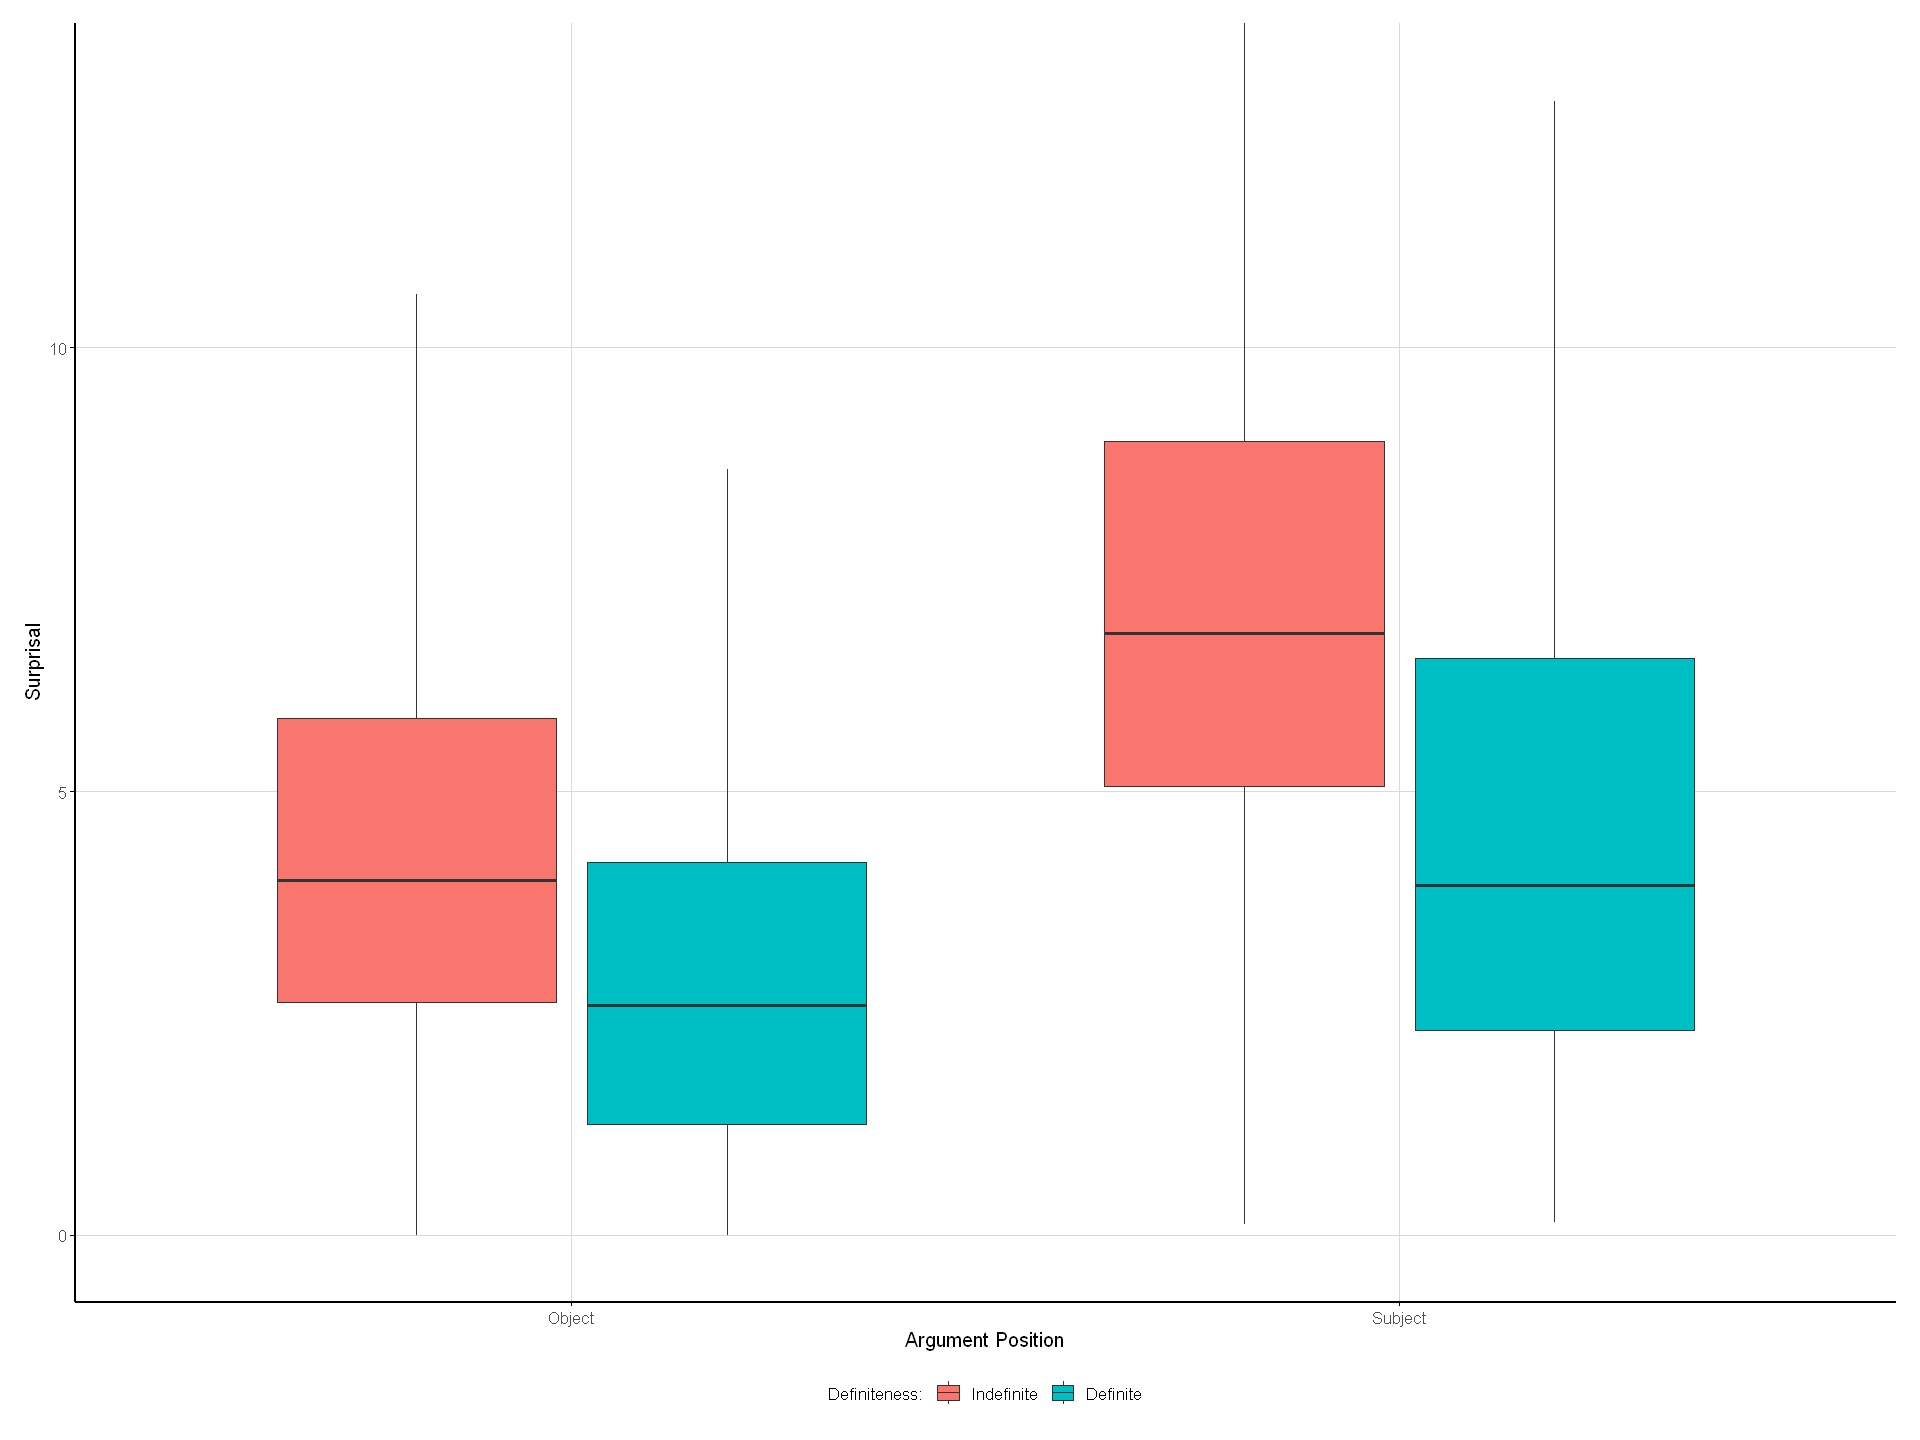

In [16]:
# Plot of argPos, definiteness, and surprisal
options(repr.plot.width = 16, repr.plot.height = 12)

p_argDefSurp <- ggplot(data = df_nps, aes(y = surprisal, x = argPos, fill = definiteness)) + 
    geom_boxplot(outlier.shape = NA) + 
        coord_cartesian(ylim = c(-.1, 13)) + 
    labs(
        # title = "Argument Position, Definiteness, and Surprisal",
        x = "Argument Position",
        y = "Surprisal",
        fill = "Definiteness:"
    ) + 
    scale_x_discrete(labels = c("sbj" = "Subject", "obj" = "Object")) + 
    scale_fill_manual(
        values = c("indef" = color_one, "def" = color_two),
        labels = c("indef" = "Indefinite", "def" = "Definite")) +  
    custom_theme + 
     plotFont(1)

p_argDefSurp

        # ggsave(
        # "plots/p_argDefSurp.png",
        # p_argDefSurp,
        # width = 8,
        # height = 6,
        # dpi = 300)

Ignoring unknown labels:
• colour : "Definiteness:"
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


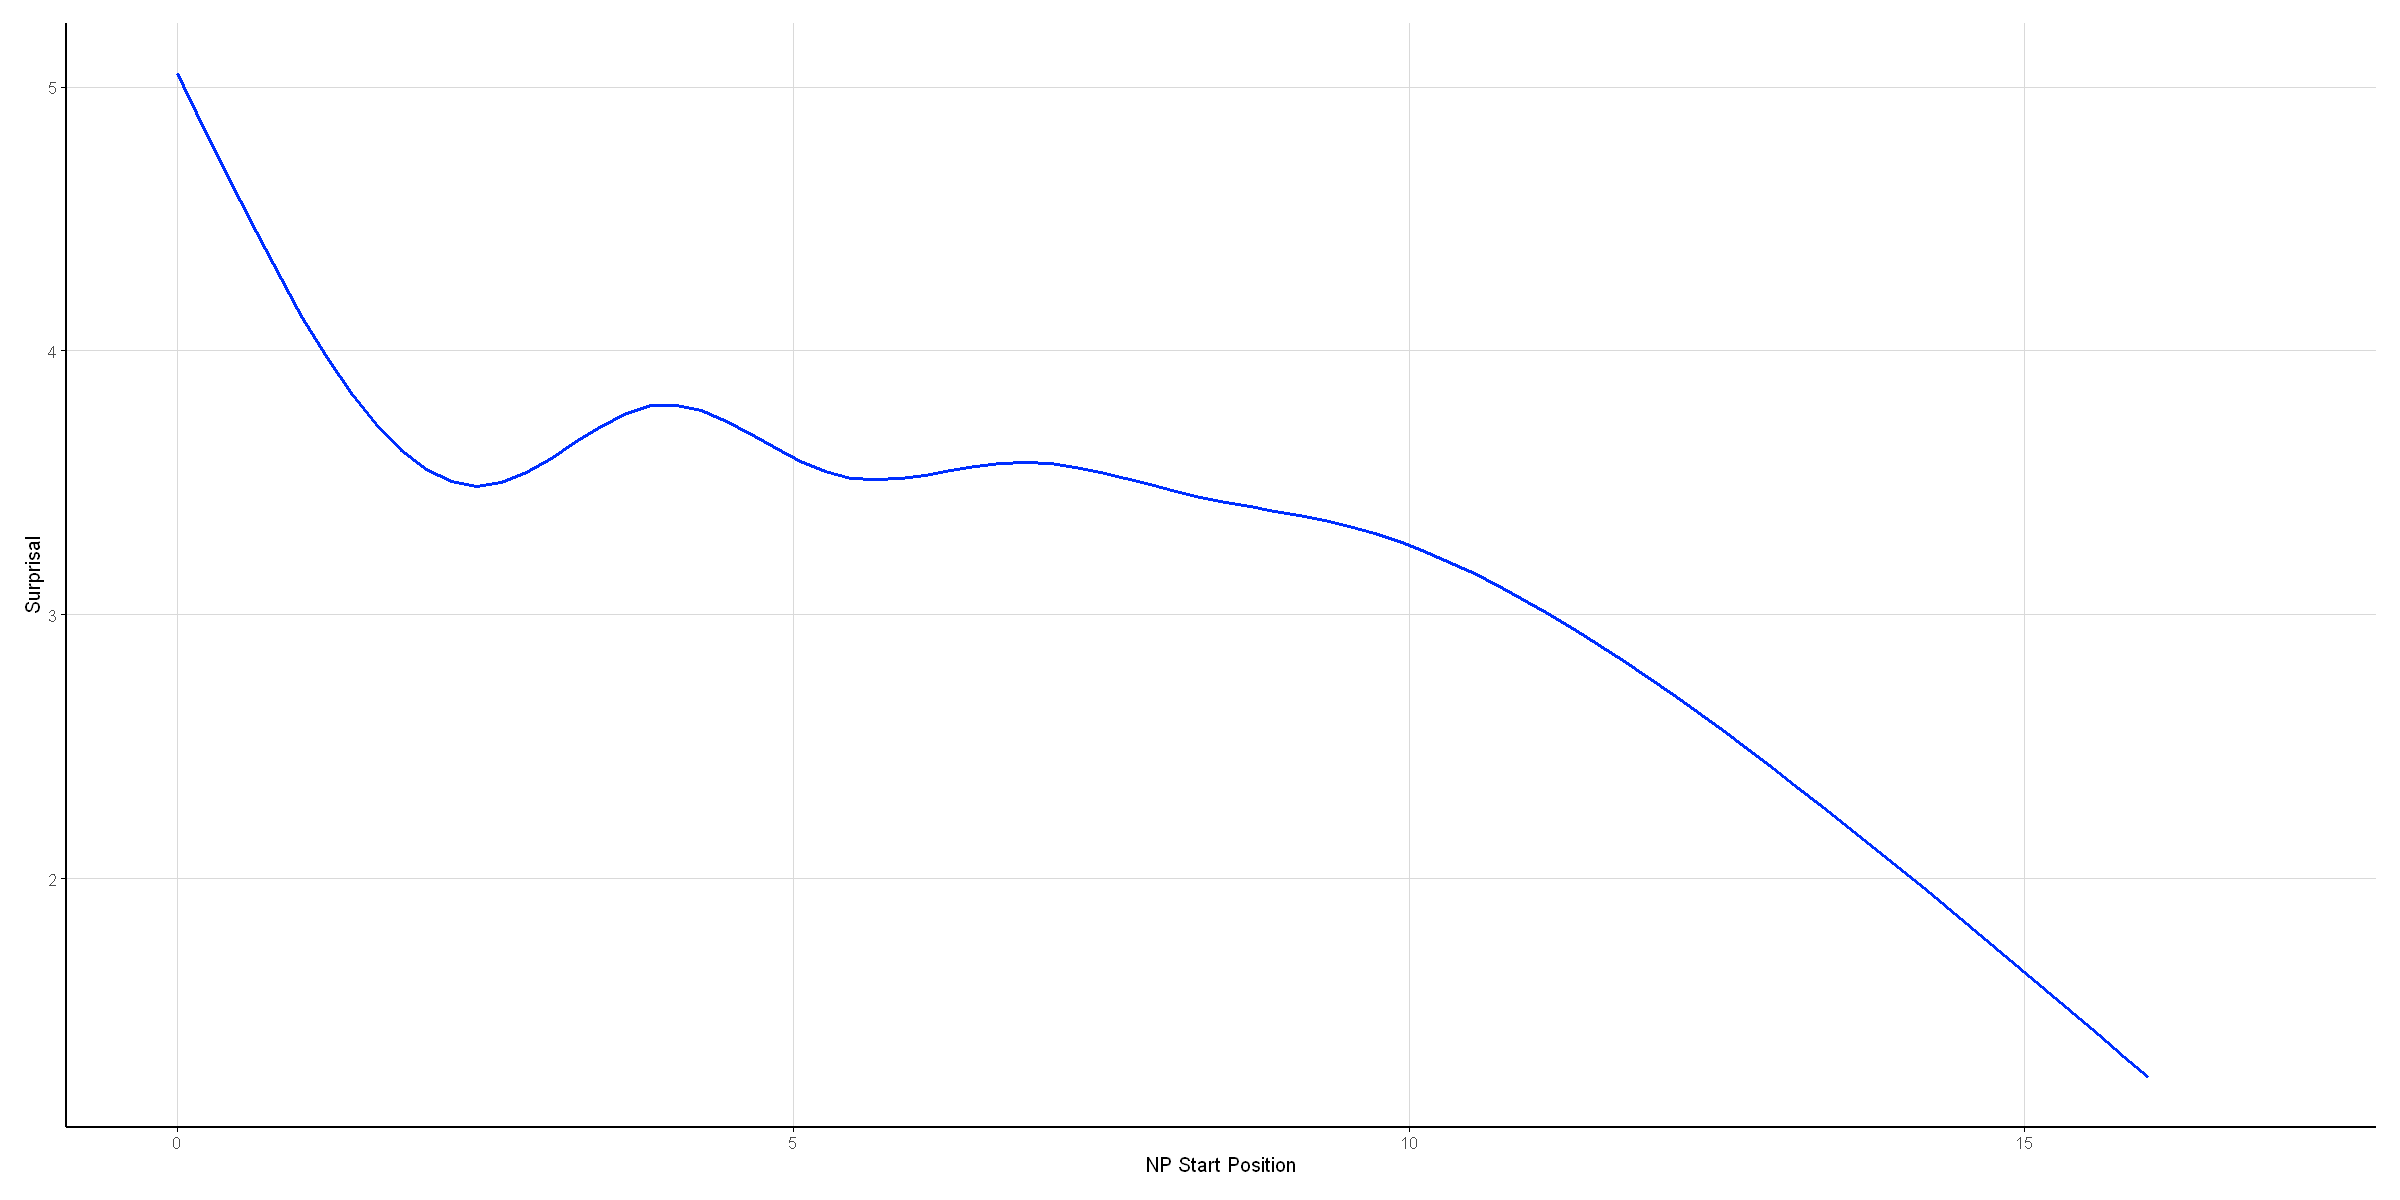

In [17]:
# Plot of effect of NP position effect: 
options(repr.plot.width = 20, repr.plot.height = 10)

p_npIdxSurp <- ggplot(data = df_nps, aes(x = np_idx, y = surprisal,)) + 
    geom_smooth(se = FALSE, color = color_highVis) + 
    coord_cartesian(x = c(-.05, 17))+ # Range of np_start_idx is 0-16
    labs(
        # title = "Surprisal and NP Start Position",
        x = "NP Start Position",
        y = "Surprisal",
        color = "Definiteness:"
    ) +  
    custom_theme + 
    plotFont(1)
    
p_npIdxSurp

# ggsave(
#         "plots/p_npIdxSurp.png",
#         p_npIdxSurp,
#         width = 10,
#         height = 5,
#         dpi = 300)


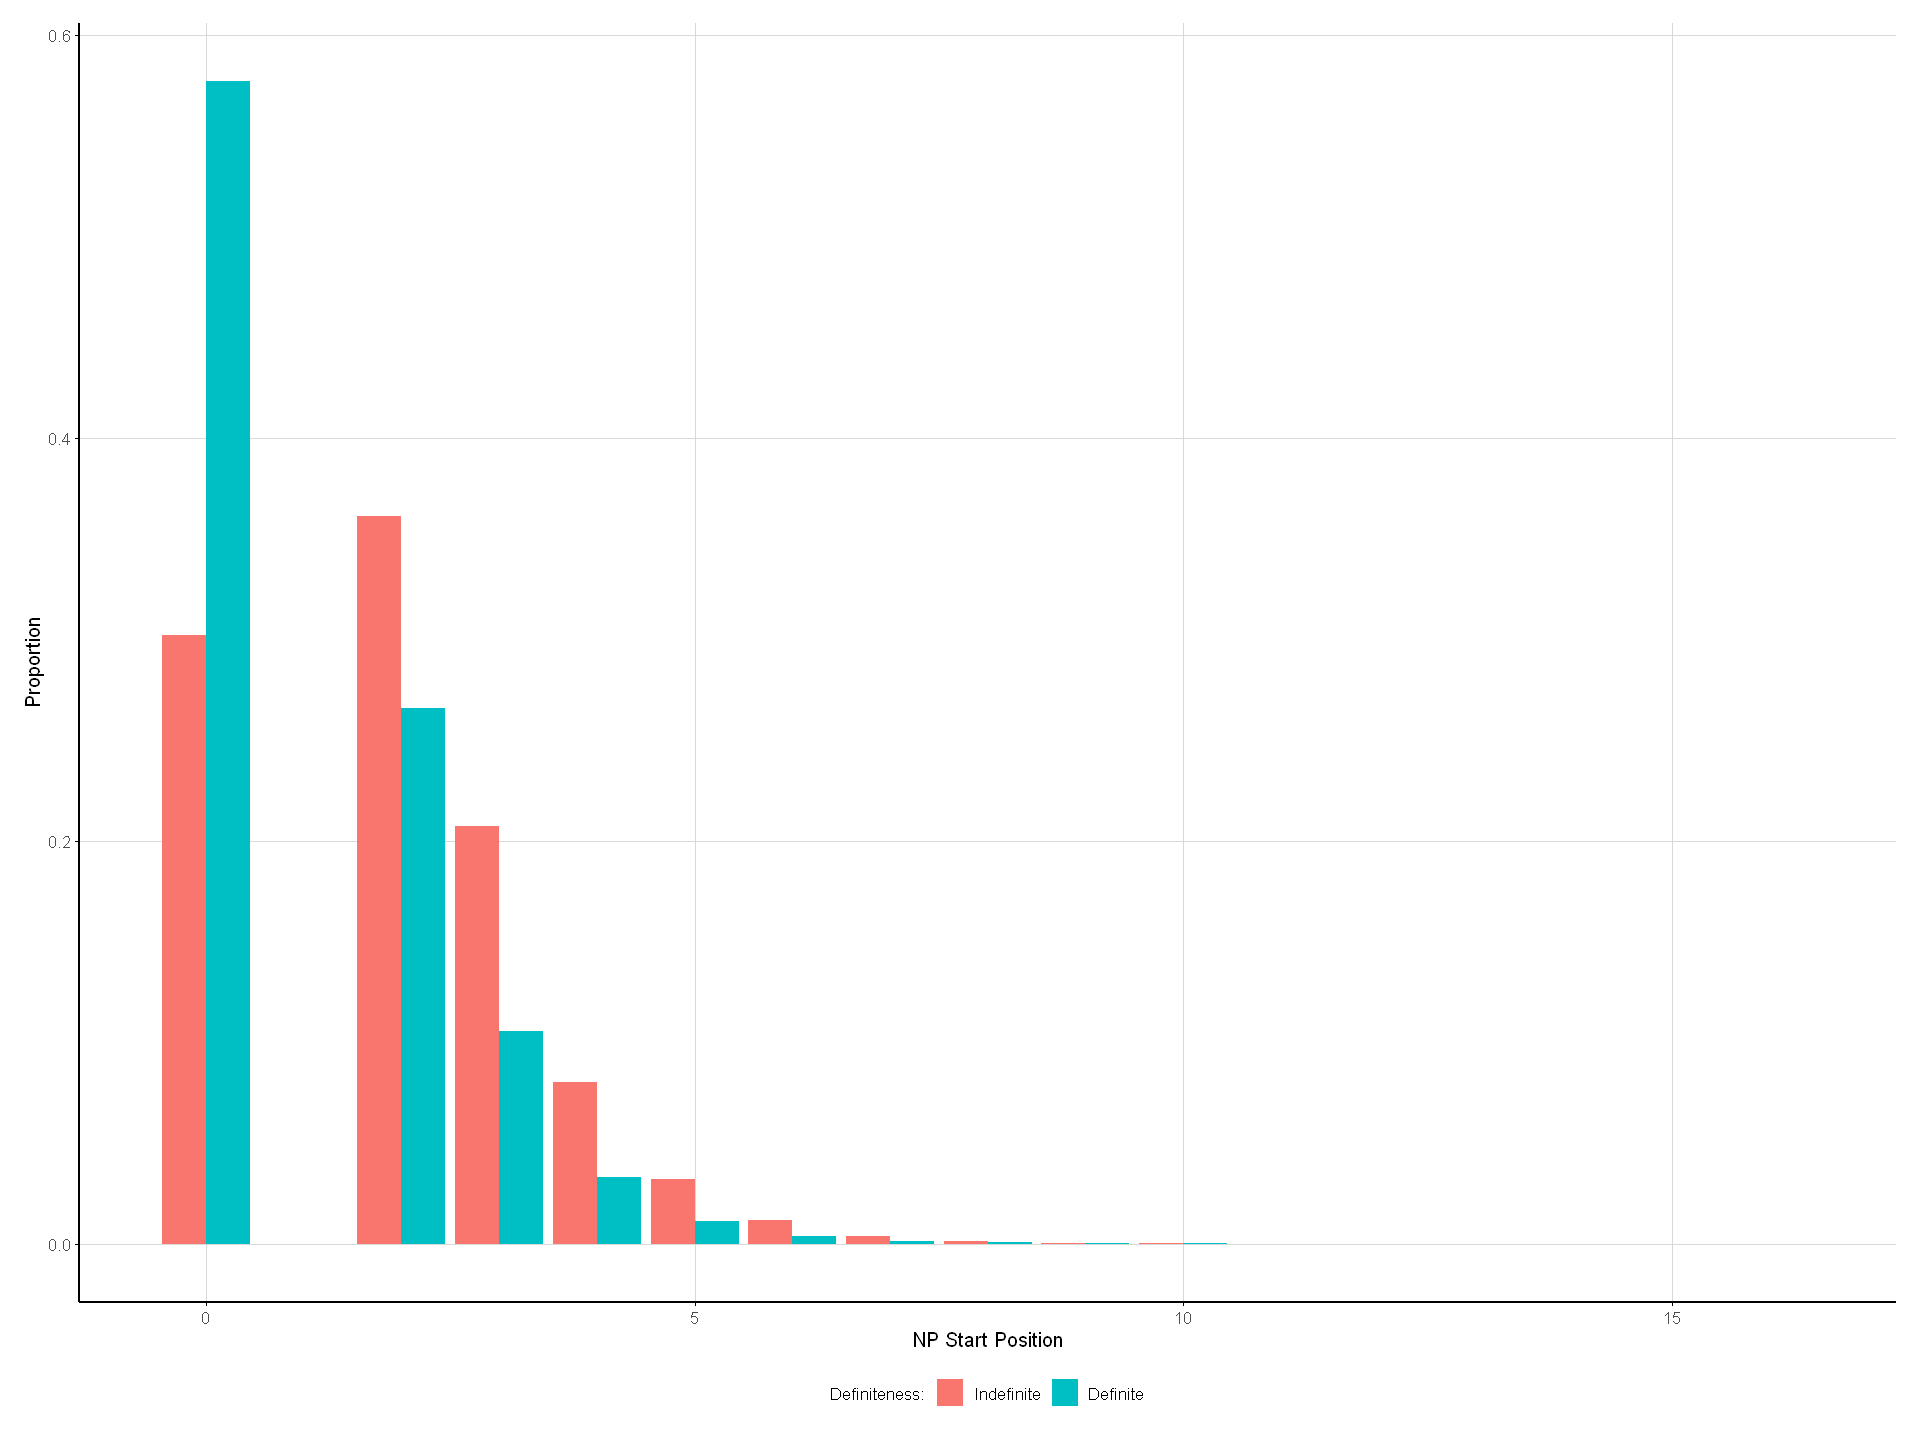

: 

In [ ]:
# Plot of position distribution
options(repr.plot.width = 16, repr.plot.height = 12)


p_npIdxProp <- ggplot(data = df_nps, aes(x = np_idx, fill = definiteness, y = after_stat(prop), group = definiteness)) + 
    geom_bar(position = "dodge") + 
    labs(
        # title = "Proportions of NP Start Positions",
        x = "NP Start Position",
        y = "Proportion",
        fill = "Definiteness:"
    ) + 
    scale_fill_manual(
    values = c("indef" = color_one, "def" = color_two),
    labels = c("indef" = "Indefinite", "def" = "Definite")) + 
    custom_theme+
    plotFont(1)

p_npIdxProp

    # ggsave(
    #     "plots/p_npIdxProp.png",
    #     p_npIdxProp,
    #     width = 8,
    #     height = 6,
    #     dpi = 300)

Ignoring unknown labels:
• size : ""


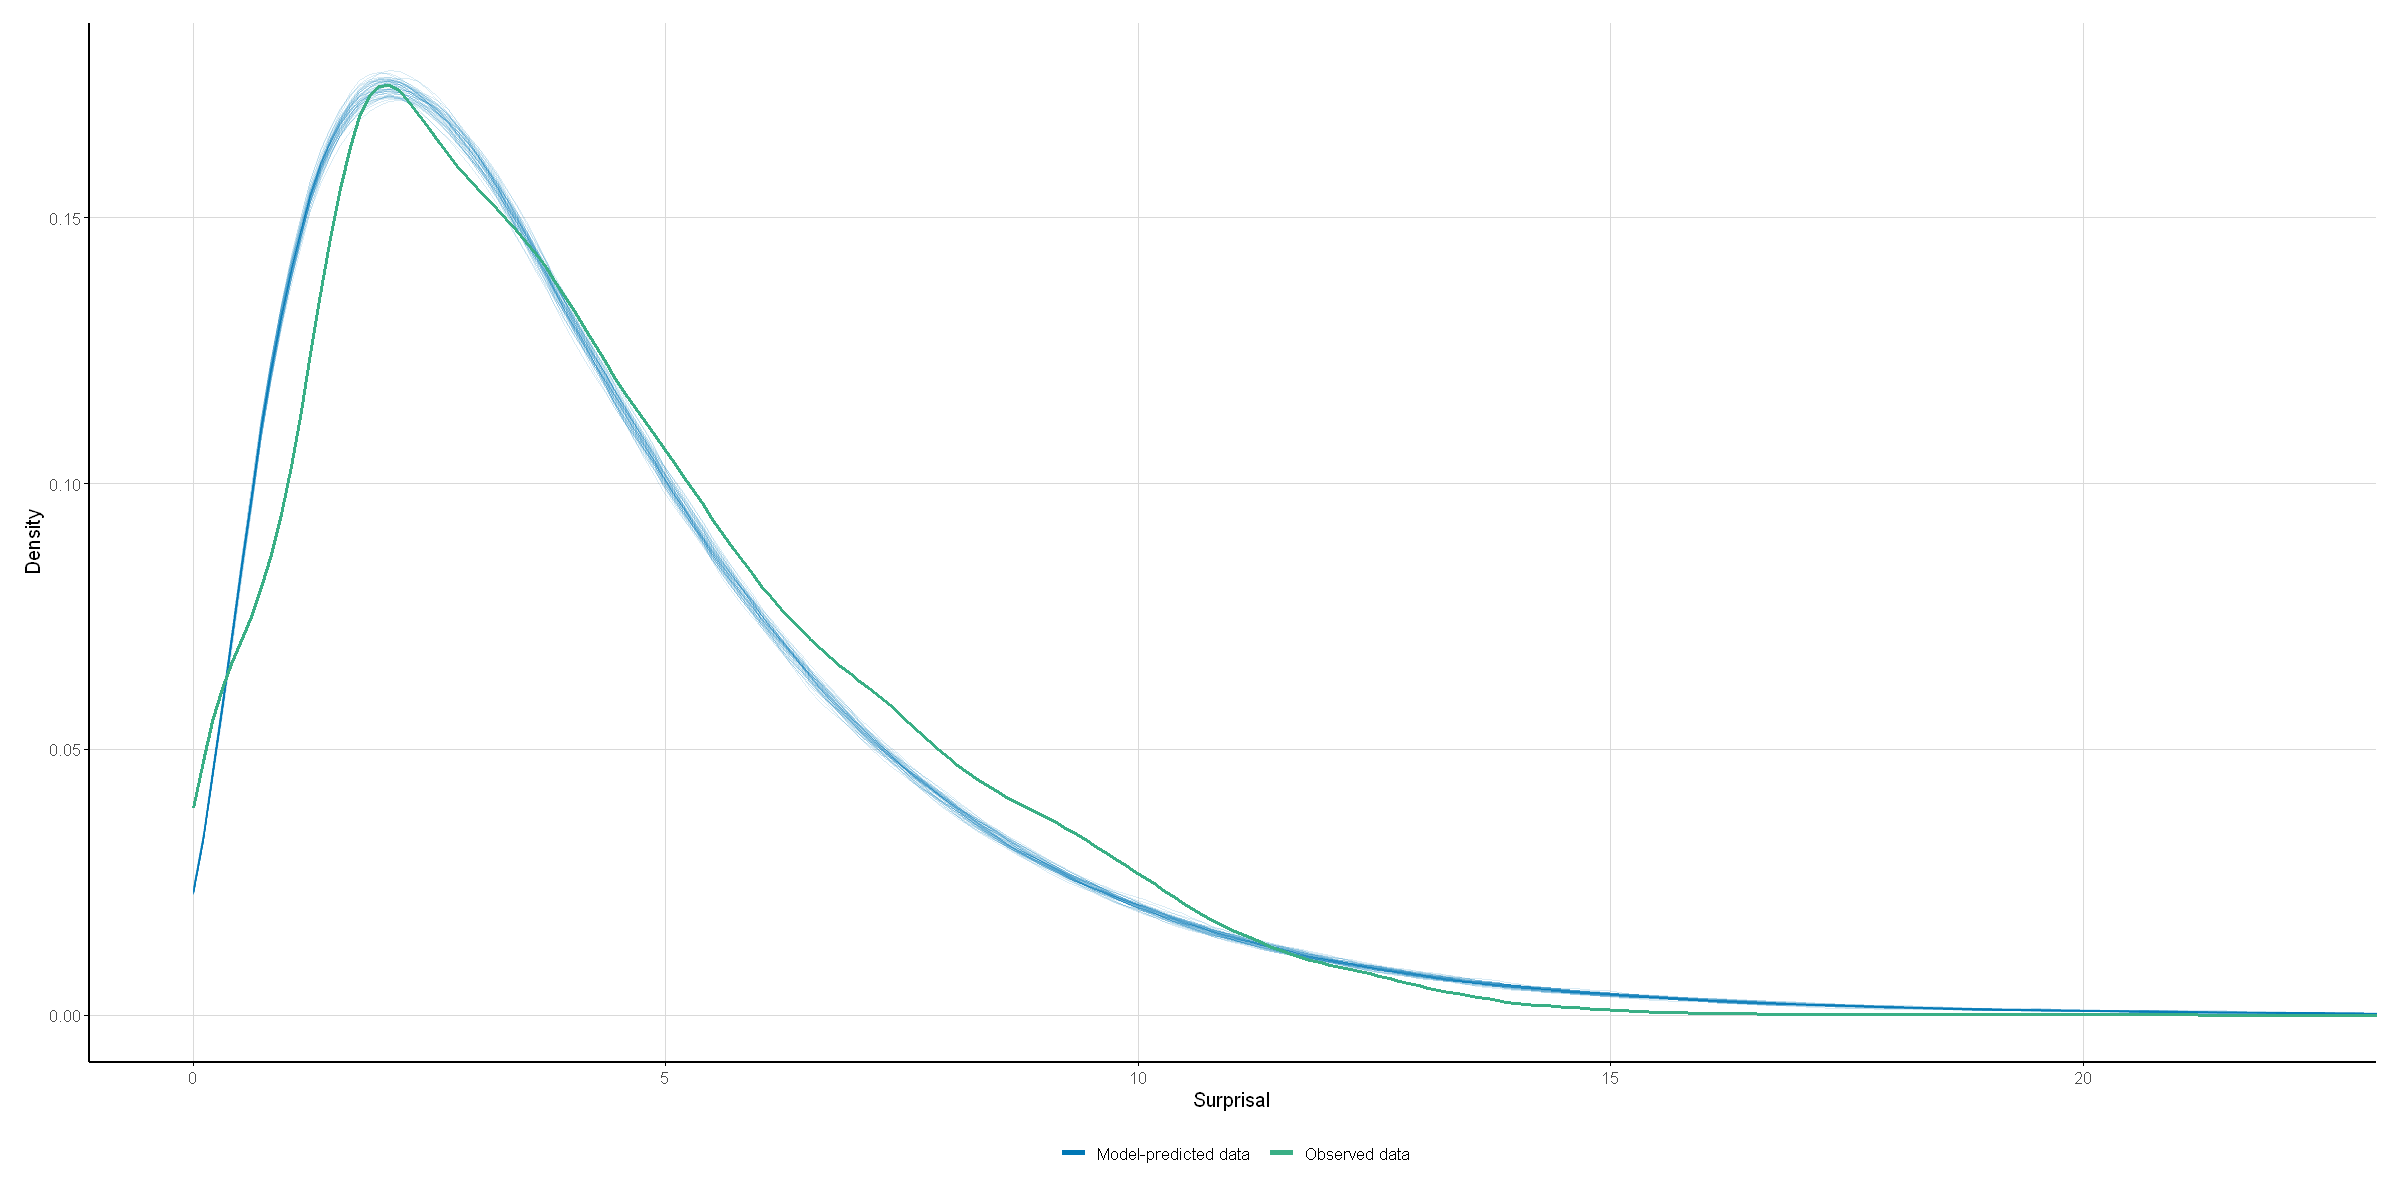

In [19]:
# Distribution of surprisals:

options(repr.plot.width = 20, repr.plot.height = 10)

p_checkMod <- plot(check_predictions(model)) + 
    coord_cartesian(x = c(0, 22)) + 
    labs(
        title = NULL,
        subtitle = NULL, 
        x = "Surprisal",
        y = "Density",
        )+
        custom_theme + 
        guides(
                color = guide_legend(override.aes = list(linewidth = 1.5))
                )+
        plotFont(1)

p_checkMod

# ggsave(
#         "plots/p_checkMod.png",
#         p_checkMod,
#         width = 10,
#         height = 5,
#         dpi = 300)

Ignoring unknown labels:
• colour : "Definiteness:"
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


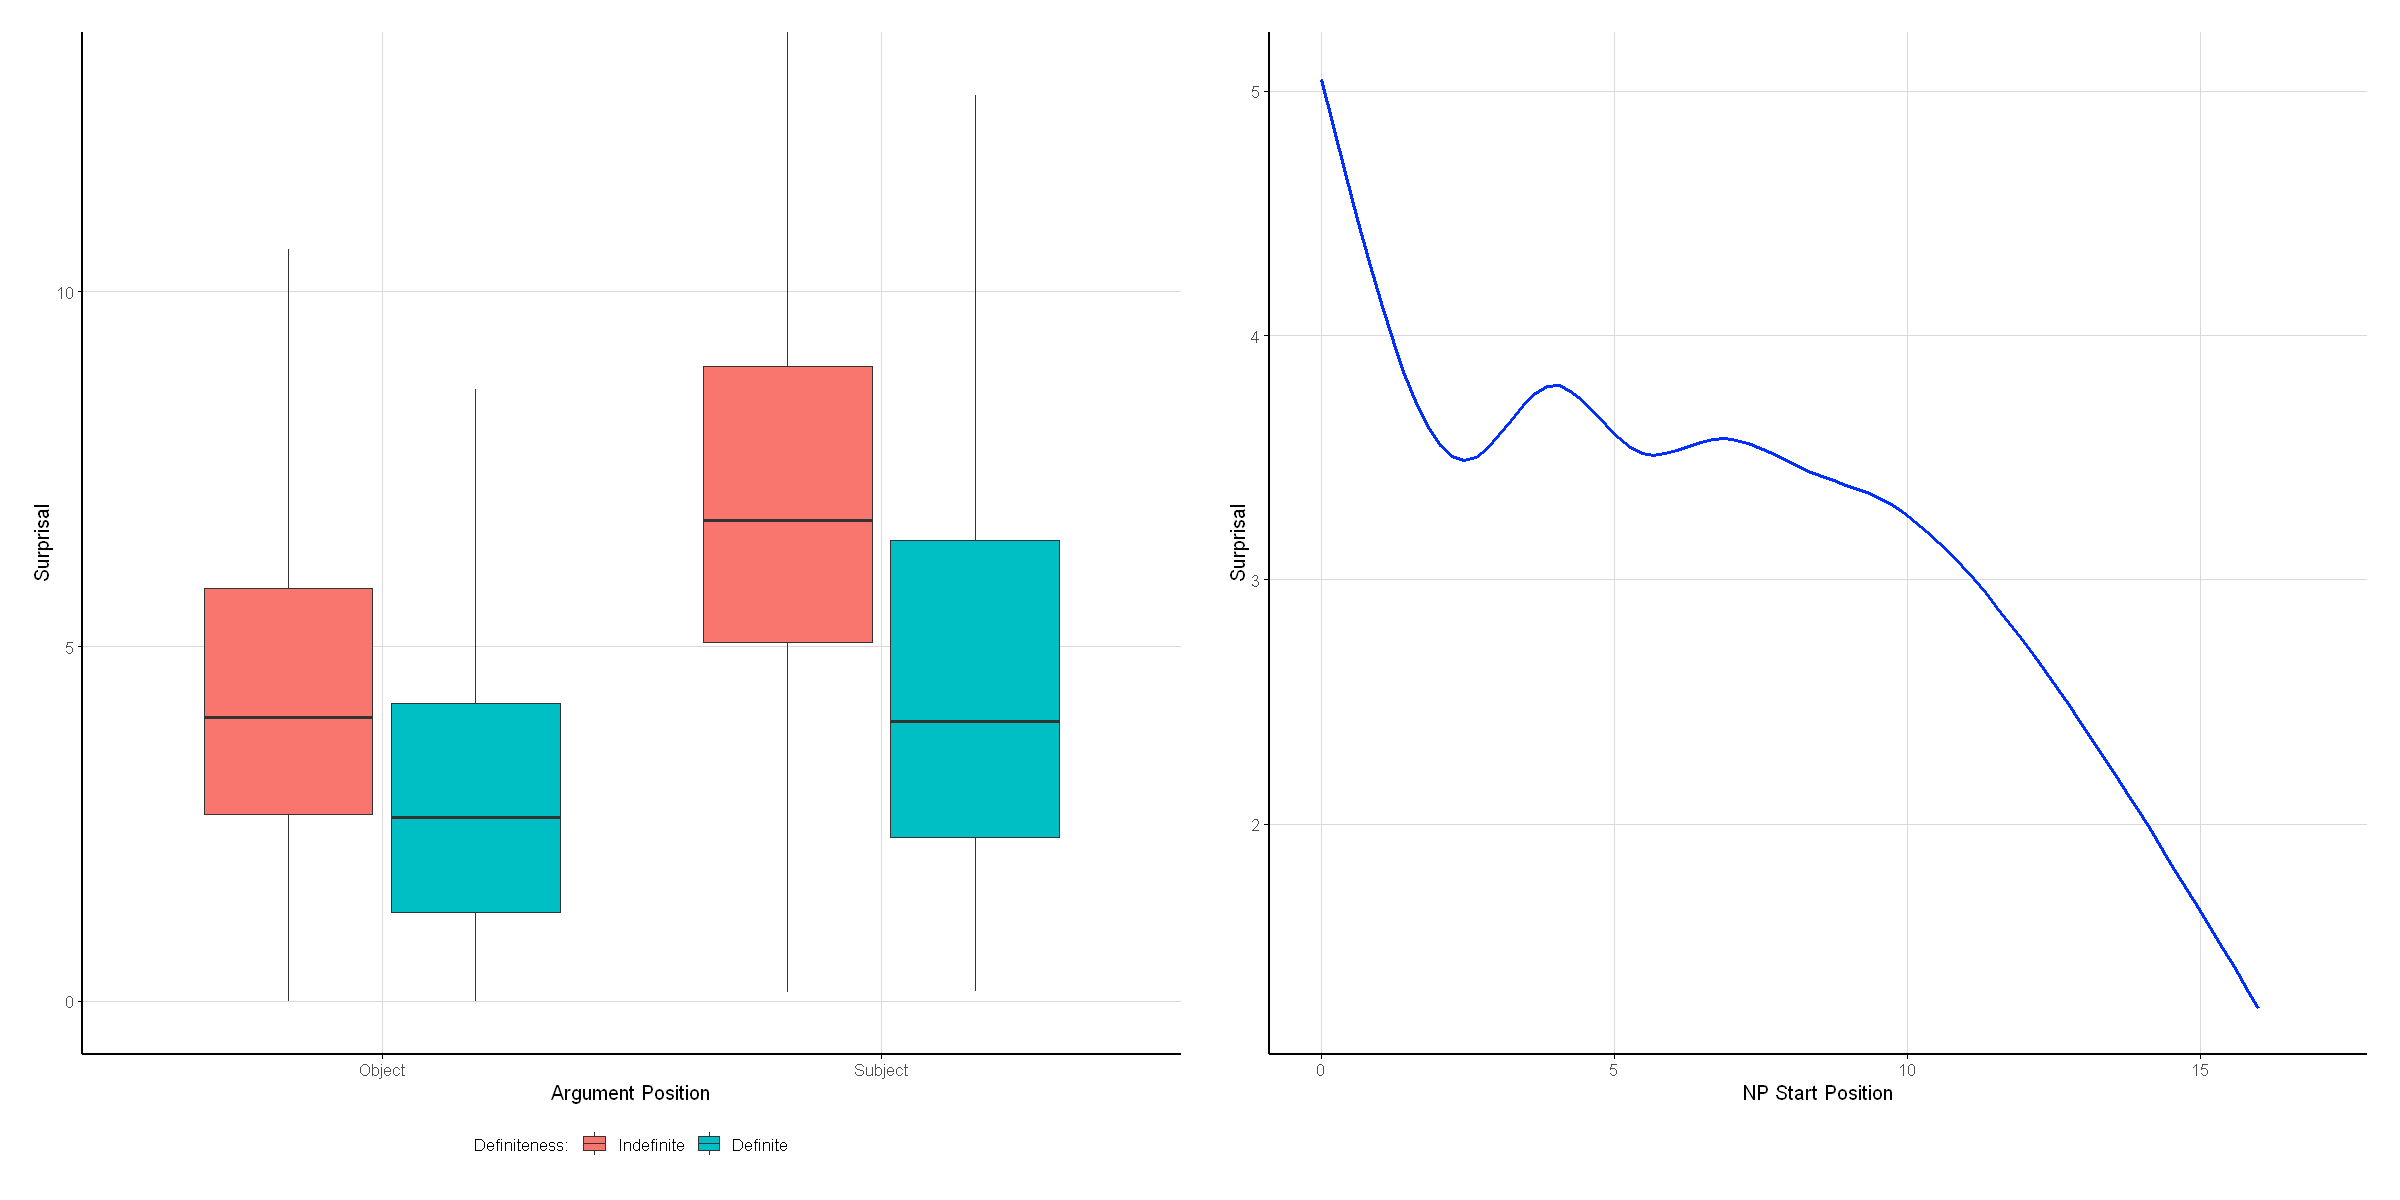

In [20]:
# Side by side of the box plot for argument and definiteness and for np position
options(repr.plot.width = 20, repr.plot.height = 10)

p_comb_surp <- p_argDefSurp + p_npIdxSurp

p_comb_surp

# ggsave(
#         "plots/p_comb_surp.png",
#         p_comb_surp,
#         width = 10,
#         height = 5,
#         dpi = 300)

NOTE: Results may be misleading due to involvement in interactions



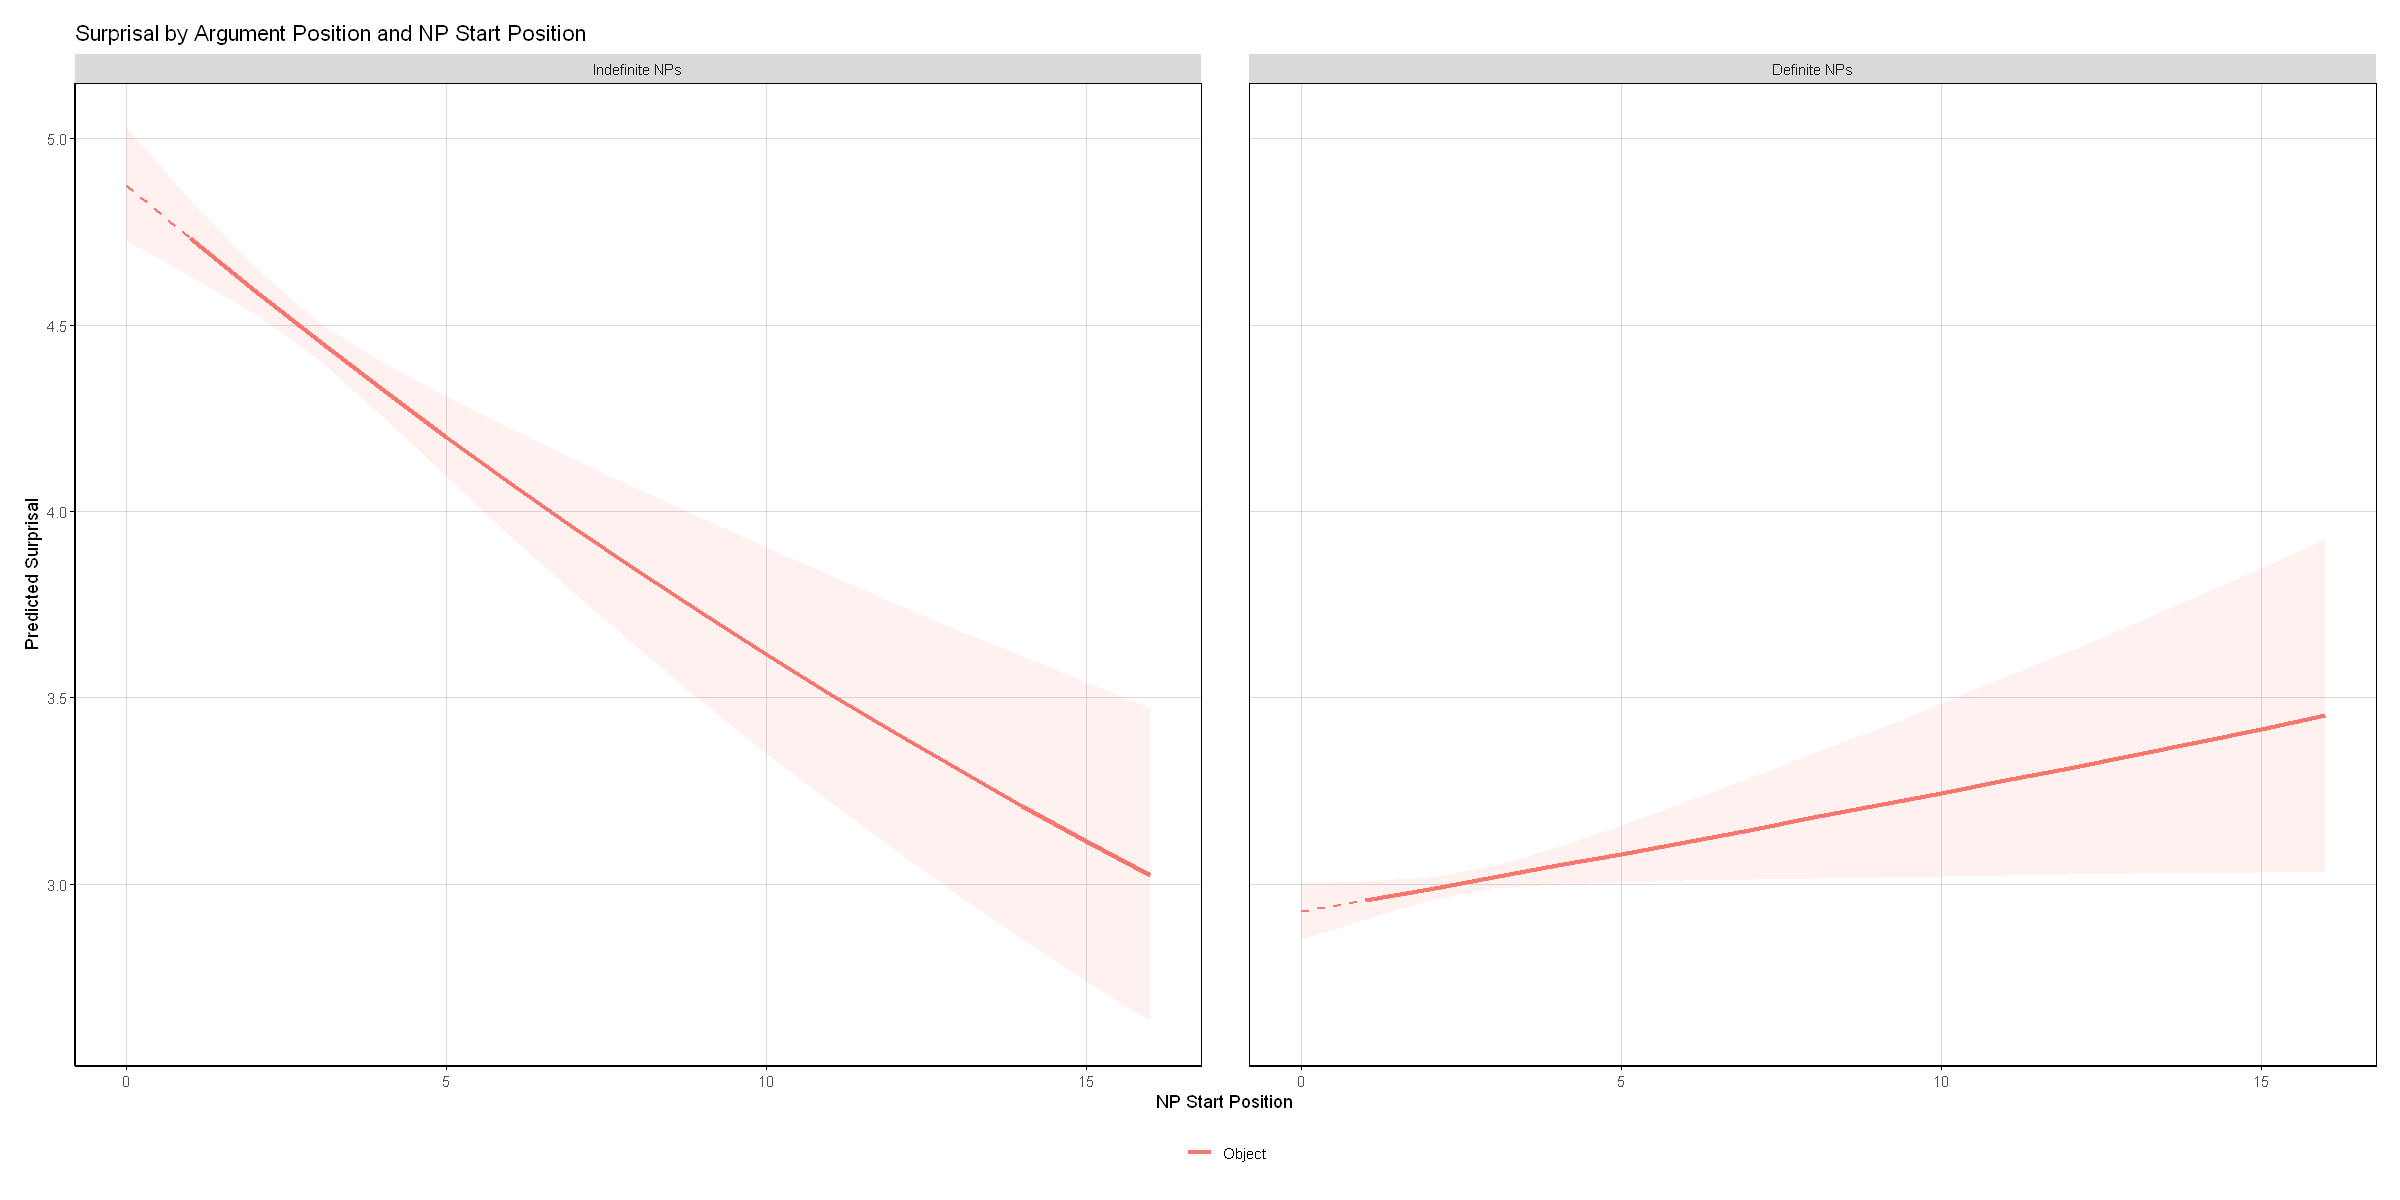

In [8]:
options(repr.plot.width = 20, repr.plot.height = 10)



# 1. Generate predictions
obj_preds <- emmeans(model, ~ np_idx | definiteness, 
                    at = list(np_idx = 0:16, argPos = "obj"), 
                    type = "response") %>% 
            as.data.frame() %>% 
            mutate(argPos = "Object")

# 2. Final GGPlot
p_npIdxInter <- ggplot() +
# Objects

#   Solid line for position >1
geom_line(
            data = filter(obj_preds, np_idx >= 1), 
            aes(
                x = np_idx, 
                y = response, 
                color = argPos, 
                group = argPos
            ), 
            linewidth = 1.2
            ) +

#   Dashed line for position <1 (i.e., those that don't exist)
geom_line(
            data = filter(obj_preds, np_idx <= 1), 
            aes(
                x = np_idx, 
                y = response, 
                color = argPos, 
                group = argPos
                ), 
            linewidth = 0.8, linetype = "dashed"
            ) +

#   CIs
geom_ribbon(
            data = obj_preds, 
            aes(
                x = np_idx, 
                ymin = lower.CL, 
                ymax = upper.CL, 
                fill = argPos
                ), 
            alpha = 0.1
            ) +

# Definiteness
facet_wrap(~definiteness, labeller = as_labeller(c(indef = "Indefinite NPs", def = "Definite NPs"))) +


# Scales and legends
scale_color_manual(values = c("Object" = color_one, "Subject" = color_two)) +
scale_fill_manual(values = c("Object" = color_one, "Subject" = color_two)) +

#   Removes fill box so there's only one legend
guides(fill = "none") + 

#   Covers all data
coord_cartesian(xlim = c(0, 16)) +

#   Adds box around each facet for visibility 
theme(panel.spacing = unit(2, "lines"), # Adds space for the line
      panel.border = element_rect(color = "black", fill = NA, linewidth = 0.5)) +

# Titles and labels
labs(title = "Surprisal by Argument Position and NP Start Position",
    x = "NP Start Position",
    y = "Predicted Surprisal",
    color = NULL) + # Removes the "Argument Role" legend label

custom_theme

p_npIdxInter

        ggsave(
        "plots/p_npIdxInter.png",
        p_npIdxInter,
        width = 10,
        height = 5,
        dpi = 300)


---

## Filtering Code: 

In [ ]:
# Read from CSV and factor them - may take ~15 minutes.


files <- list.files(path = "D:/BNC Full Data/12-18 Run/CSV",
                    pattern = "\\.csv$",
                    full.names = TRUE)

df_full <- read_csv(files, id = "file_name") %>% 
        mutate( 
        definiteness = factor(definiteness, levels = c("indef", "def", "unmarked")),
        argPos = factor(argPos, levels = c("obj", "sbj", "non-arg"))
        ) 

write_parquet(df_full, "Data/Full Data Unfactored.parquet")
###



In [ ]:
df_full <- df_full_unfact %>%
    mutate( 
        definiteness = factor(definiteness, levels = c("indef", "def", "unmarked")),
        argPos = factor(argPos, levels = c("obj", "sbj", "non-arg"))
        ) 



write_parquet(df_full, "Data/Full Data.parquet")

In [ ]:
df_sent <- df_full %>%
    select(
        -filename, 
        -w_pos, 
        -w_dep,
        -is_bare_np,
        -np_struct,
        -det_pos,
        -head_dep,
        -det_dep,
        -np_sum_surp,
        -np_mean_surp
    ) %>%
    #
    # Removes duplicate sentences
    arrange(sentence_id) %>% 
    group_by(s_text) %>% 
    filter(sentence_id == first(sentence_id)) %>% 
    ungroup() %>%
    # 
    # Filter by criteria
    filter(
        modality == "written", 
        s_verb_count  == 1,
        s_aux_count == 0,
        s_sbj_count == 1,
        s_tot_obj_count %in% 1,
        s_dir_obj_count == 1 ,
        s_ind_obj_count == 0,
        s_sub_conj_count == 0,
        s_coord_conj_count == 0, 
        s_clausal_comp_count == 0,
        s_rel_clause_count == 0, 
        s_adv_clause_count == 0, 
        s_pp_cnt == 0,
        s_comma_count == 0,
        !str_detect(s_text, "\\?"), # Is there a question mark in the text
        s_trans == TRUE,
    ) %>%
    select(
        -modality, 
        -s_verb_count,
        -s_aux_count,
        -s_sbj_count,
        -s_tot_obj_count,
        -s_dir_obj_count,
        -s_ind_obj_count,
        -s_sub_conj_count,
        -s_coord_conj_count, 
        -s_clausal_comp_count,
        -s_rel_clause_count, 
        -s_adv_clause_count, 
        -s_pp_cnt,
        -s_comma_count,
    ) %>%
    # 
    # Removes sentences with invalid argPos or definiteness values, only keeping sentences with exactly one subject and one object
    group_by(sentence_id) %>%
        filter(
            all(
                (is_noun == TRUE & argPos %in% c("obj", "sbj") & definiteness %in% c("indef", "def")) |
                (is_noun == FALSE)
            )
        ) %>% 
    ungroup() %>%
    #
    # Tagging the index of the first token of each NP
        # Finds Token
    arrange(sentence_id, w_idx) %>%
    group_by(sentence_id) %>% 
    mutate(
        prev_is_noun = lag(is_noun, default = FALSE),
        prev_np_head_txt = lag(head_text),
        first_tok_np = is_noun & (!prev_is_noun | head_text != prev_np_head_txt)
        ) %>%
    ungroup() %>% 
        # Takes index and copies to all rows in NP
    select(-prev_is_noun, -prev_np_head_txt) %>% 
    group_by(sentence_id, np_id = consecutive_id(phr_tok)) %>%
    mutate(
        np_idx = ifelse(
            is.na(phr_tok) | is_noun == FALSE,
            NA,
            min(w_idx)
            ) 
        ) %>% 
        ungroup() %>% 
        select(-np_id) %>% 
    #
    # Removes sentences where subjects are not the first word, i.e. utterance inversion
    group_by(sentence_id) %>%
    filter(
        all(
                (argPos == "sbj" & np_idx == 0) | 
                (argPos != "sbj") | 
                is.na(argPos)
        )
    ) %>% 
    ungroup()


write_parquet(df_sent, "Data/Filtered Sentences.parquet")

In [ ]:
# Creates datatable of just head nouns for analysis:

df_nps <- df_sent %>% 
    select(
        -head_text,
        -det_text,
    ) %>%
    mutate(
        definiteness = droplevels(factor(definiteness)),
        argPos = droplevels(factor(argPos))
    ) %>%
    filter(
        is_noun == TRUE, 
        is_np_head == TRUE,
        !is.na(surprisal)
    ) %>% 
    group_by(sentence_id) %>% 
    filter(n() == 2 & n_distinct(argPos) == 2) %>%
    ungroup() %>% 
    select(bnc_id, sentence_id, s_text, phr_tok, surprisal, argPos, definiteness, np_idx)

write_parquet(df_nps, "Data/NPs Only.parquet")


---

## Other Functions:

In [ ]:
context <- function(df, target_id, num=3) {

    dt <- as.data.table(df)

    u_ids <- unique(dt$sentence_id)
    

    target_pos <- match(target_id, u_ids)
    
    if (is.na(target_pos)) return(NULL)
    

    start_idx <- max(1, target_pos - num)
    end_idx   <- target_pos - 1
    
    prev_ids <- if (target_pos > 1) u_ids[start_idx:end_idx] else integer(0)
    
    dt_context <- dt[.(prev_ids), on = "sentence_id", mult = "first"]
    dt_context[, phr_tok := ""]
    dt_context[, surprisal := NA]
    
    dt_target <- dt[sentence_id == target_id]
    
    result <- rbind(dt_context, dt_target)

    result <- result %>%  select(bnc_id, sentence_id, s_text, phr_tok, surprisal, argPos, definiteness)

    # result <- result %>% select(-grp_idx)

    as_tibble(result)
    }

    context_full <- function(df, target_id, num=3) {
    dt <- as.data.table(df)
    dt[, grp_idx := rleid(sentence_id)]
    target_grp <- dt[sentence_id == target_id, grp_idx[1]]
    result <- dt[grp_idx >= (target_grp - num) & grp_idx <= target_grp]
    result <- result %>% select(-grp_idx) %>%  select(bnc_id, sentence_id, s_text, phr_tok, surprisal, argPos, definiteness)
    as_tibble(result)
}